In [212]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

Load the Iris dataset

In [213]:
iris = load_iris()

Split train and test `70/30`

In [214]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

Training and predictions

In [215]:
# Train a Decision Tree classifier on the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set and calculate the accuracy score
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy}"

'Accuracy: 1.0'

Classification report

In [216]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [217]:
#!conda install graphviz

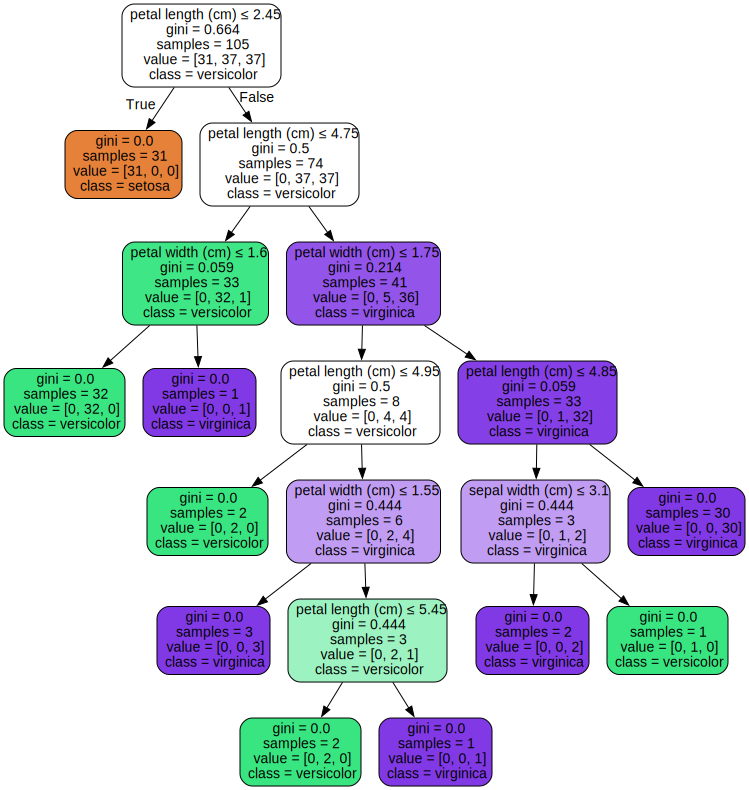

In [218]:

from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz

# Export the Decision Tree to a Graphviz file
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                           class_names=iris.target_names, filled=True, rounded=True,
                           special_characters=True)

# renderring graph to jupyter notebook
graph = graphviz.Source(dot_data)

# render graph to png and saving it to rsc folder
graph.render("../rsc/iris_decision_tree", format='png', cleanup=True)

# render graph to pdf and saving it to rsc folder
#graph.render("../rsc/iris_decision_tree", format='pdf', cleanup=True)

display(graph)

- gini is a measure of impurity
    - "a measure of how often an element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset".
    - "It reaches its minimum (zero) when all cases in the node fall into a single target category".
    - A split in a decision tree is considered good if it leads to a reduction in the Gini impurity of the subsets created after the split.
    - To calculate it, we sum the probabilities of each class squared and subtract it from 1. The formula for Gini impurity is: `Gini = 1 - Σ (pi)^2`.
    
    
        Where pi is the probability of an element belonging to a particular class.

    
- entropy is a measure of information gain

- max_depth is the maximum depth of the tree

- min_samples_split is the minimum number of samples required to split an internal node

- min_samples_leaf is the minimum number of samples required to be at a leaf node

- max_features is the number of features to consider when looking for the best split

- max_leaf_nodes is the maximum number of leaf nodes allowed in the tree

- when the gini impurity is 0, the node is pure
- when the gini impurity is 0.5, the node is equally split
- when the gini impurity is 1, the node is impure

max_depth = 3

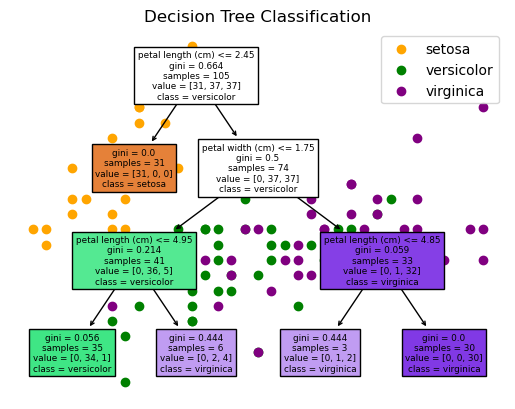

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [227]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# max_depth = 3
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Plot the decision tree
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

colors = ['orange', 'green', 'purple']

# Plot the training points

#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(colors))

for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=target_name, color=colors[i])

plt.title("Decision Tree Classification")
plt.legend()
plt.show()

print(classification_report(y_test, y_pred))

max_depth = 5

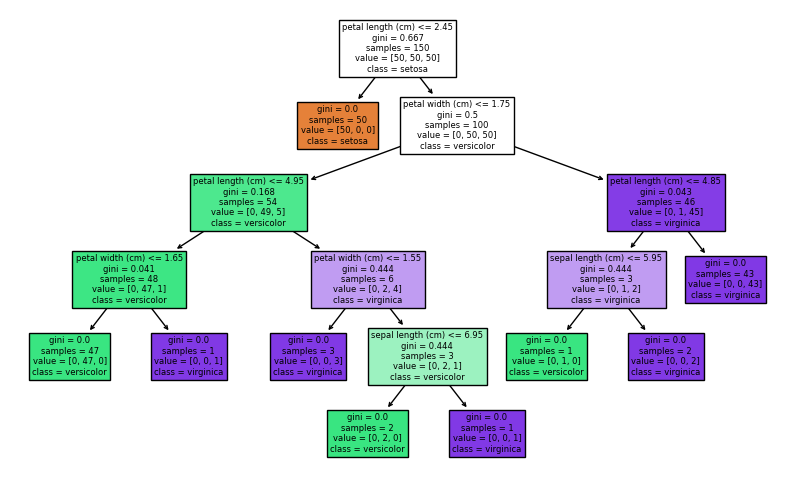

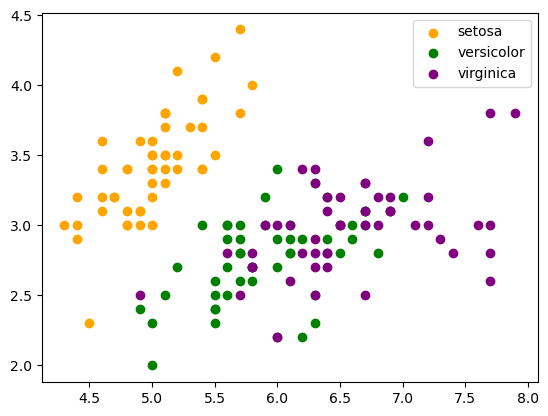

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [220]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the iris dataset
iris = load_iris()

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(iris.data, iris.target)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Create separate scatter plots for each class
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]
plt.scatter(setosa[:, 0], setosa[:, 1], c='orange', label='setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], c='green', label='versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], c='purple', label='virginica')
plt.legend()
plt.show()

print(classification_report(y_test, y_pred))

In [224]:
# predict the class for a new data point
new_data = [[5.0, 3.6, 1.3, 0.25]] # setosa
clf.predict(new_data)

array([0])